# Faktor Yang Mempengaruhi Harga Mobil

# Konten <a id='back'></a>
* [Pendahuluan](#intro)
* [Tahap 1.Pra Pemrosesan Data](#datareview)
     * [1.1 Mengatasi Nilai Yang Hilang](#missingvalues)
     * [1.2 Memperbaiki Tipe Data](#datatype)
     * [1.3 Memperbaiki Kualitas Data](#dataquality)
* [Tahap 2. Mempelajari Parameter Inti](#dataparameter)
     * [2.1 Histogram](#hist)
     * [2.2 Outlier](#outlier)
* [Tahap 3. Masa Berlaku Iklan](#dataads)
     * [Kesimpulan](#conclusion) 
* [Tahap 4. Faktor Harga Truck](#truck)
* [Tahap 5. Faktor Harga SUV](#suv)
* [Kesimpulan Akhir](#final)


# Pendahuluan

Saya adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web ini setiap hari. Saya perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

Dalam proyek kali ini, saya akan menganalisa berbagai faktor yang menentukan penjualan sebuah mobil. Analisa ini dilakukan dengan tujuan untuk memilah berbagai faktor yang mempengaruhi penjualan ,
misalnya apakah mobil tersebut adalah keluaran baru,bagaimana kondisi mobil, total jarak tempuh mobil dan lain sebagainya. Untuk mendapatkan hasil analisis,
saya akan melakukan beberapa perubahan dan penghapusan jika diperlukan, membuat histogram dan memberikan beberapa kesimpulan yang didapat dari semua proses tersebut.

## Tujuan
Menguji 2 hipotesis :
1. Adanya faktor yang dapat berpengaruh pada penjualan mobil
2. Pengaruh iklan pada jenis kendaraan

## Tahapan
Data tentang berbagai faktor penjualan mobil disimpan dalam berkas /datasets/vehicle_us.csv/. Tidak ada informasi lengkap mengenai data ini, maka akan diperiksa terlebih dulu sebelum melakukan analisa data.

Jika terdapat masalah pada data dan merupakan hal yang signifikan maka akan dilakukan solusi sesuai kondisi data.
Proyek ini terdiri dari beberapa tahap :
1. Pra Pemrosesan Data
2. Mempelajari Parameter Inti
3. Membandingkan Faktor Dengan Scatterplot
4. Menguji Hipotesis


[Kembali ke Daftar Isi](#back)

## Pra-pemrosesan

In [3]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Memuat Data

In [4]:
# Muat file data menjadi DataFrame
try :
  df = pd.read_csv('/datasets/vehicles_us.csv')
except :
  df = np.read_csv('/datasets/vehicles_us.csv')


### Mengeksplorasi Data Awal

*Dataset* ini berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [12]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [13]:
# tampilkan sampel data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
df.duplicated().sum()

0

Dari tampilan informasi umum, dapat kita lihat bahwa pada beberapa kolom seperti model_year, cylinders, odometer, paint_color, is_4wd memiliki nilai yang hlang, terutama pada kolom is_4wd.
Belum diketahui dengan pasti apa yang terjadi pada kolom-kolom tersebut. Tidak ada duplikat pada data ini. Mari lakukan penyelidikan lebih lanjut. 

Kolom model_year memiliki tipe data float64, karena tidak ada tahun dalam bentuk desimal, misal 2011 bukan 2011.0
Hal yang sama juga terjadi pada kolom cylinders, seharusnya cylinder tidak dituliskan dalam bentuk desimal.
Untuk odometer memang tidak dituliskan dalam desimal, walaupun ada dalam beberapa kasus odometer dihitung dengan desimal,
akan tetapi angka yang ditampilkan akan dibulatkan dan tidak dalam bentuk desimal.

Ada beberapa kolom memiliki nilai yang hilang. Kolom yang memiliki jumlah nilai hilang terbanyak adalah kolom is_4wd, kolom ini hanya memiliki nilai sebanyak 25572

Berikut beberapa kolom dengan nilai yang hilang : model_year, cylinders, odometer, paint_color, is_4wd. Adanya banyak nilai yang hilang tentu tidaklah normal, kita harus mencari tahu penyebab nilai yang hilang tersebut dan melihat apakah perlu dihapus saja atau diisi.
Kemudian ada juga kolom dengan tipe data tidak sesuai yaitu kolom model_year, cylinders, dan odometer. Untuk hal ini perlu dilakukan pengubahan tipe data.

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

In [14]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Mengatasi Nilai Hilang Kolom model_year
Dengan banyaknya jumlah nilai yg hilang di tiap kolom, saya rasa tidak mungkin untuk menghapusnya. Maka saya menggunakan fungsi berikut ini untuk mengisi nilai yang hilang.

In [6]:
# mengisi nilai yang hilang pada kolom model_year
def fill_missing_value (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

df = fill_missing_value(df,'model','model_year')

Untuk mengisi nilai yang hilang, saya menggunakan fungsi seperti di atas. Saya menggunakan median karena pada saat menggunakan boxplot,
bagian data mengalami kemiringan. Kolom yang digunakan pada 'group' adalah 'model' yang akan diagregasi, serta untuk 'value' menggunakan kolom 'model_year'.
Lalu reset_index digunakan untuk menjadi kolom.

for i in range disini berfungsi untuk proses looping jika ada missing value pada kolom 'model_year' maka akan diisi dengan value berdasarkan 'model'.
Dan pada baris dataframe.loc dilakukan looping dengan kolom yg di agregasi dan jika ada nilai pada kolom pada value yg kosong,
maka akan diisi dari hasil value [(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column].
Kemudian reset_index dilakukan agar menjadi kolom.

### Mengatasi Nilai Hilang Kolom Cylinders

In [7]:
# mengisi nilai yang hilang pada kolom cylinders
df = fill_missing_value(df, 'model','cylinders')

Fungsi ini sama dengan fungsi diatas, jadi saya tidak akan menjelaskan dengan panjang. Untuk setiap nilai hilang pada kolom 'cylinders', akan diisi dengan value berdasarkan kolom 'model'.

### Mengatasi Nilai Hilang Kolom Odometer

In [8]:
# mengisi nilai yang hilang pada kolom odometer
df = fill_missing_value(df, 'condition','odometer')

Masih sama dengan fungsi diatas, nilai yang hilang pada kolom 'odometer' akan diisi dengan value berdasarkan kolom 'condition'.

### Mengatasi Nilai Hilang Kolom is_4_wd

In [18]:
df['is_4wd'] = df['is_4wd'].fillna(0)

Karena kolom is_4wd memiliki jumlah nilai hilang terbanyak, tidak mungkin untuk menghapus kolom ini. Maka dari itu saya memutuskan untuk mengisi nilai hilang dengan 0.

### Mengatasi Nilai Hilang Kolom paint_color

In [19]:
df['paint_color'] = df['paint_color'].fillna('unknown')

Saya mengisi nilai hilang pada kolom paint_color dengan unknown karena tidak diketahui apa warna dari mobil-mobil tersebut.

In [20]:
# mengecek nilai yang hilang
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

Semua nilai hilang sudah terisi.

## Memperbaiki Tipe Data

In [21]:
# memperbaiki tipe data kolom model_year
df['model_year'] = df['model_year'].astype(int)

In [22]:
# memperbaiki tipe data kolom cylinders
df['cylinders'] = df['cylinders'].astype(int)

In [23]:
# memperbaiki tipe data kolom odometer
df['odometer'] = df['odometer'].astype(int)

Mengubah tipe data ketiga kolom diatas menjadi integer, karena nilai pada ketiga kolom tersebut tidak seharusnya dalam bentuk desimal.

In [24]:
# memperbaiki tipe data kolom is_4wd
df['is_4wd'] = df['is_4wd'].astype(bool)

Mengubah tipe data ini karena nilai kolomnya merupakan boolean.

## Memperbaiki Kualitas Data

In [25]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
df['week_listed'] = pd.DatetimeIndex(df['date_posted']).dayofweek
df['month_listed'] = pd.DatetimeIndex(df['date_posted']).month
df['year_listed'] = pd.DatetimeIndex(df['date_posted']).year

In [26]:
# Tambahkan usia kendaraan saat iklan ditayangkan
df['age_of_car'] = df['year_listed'] - df['model_year']

In [27]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df['mileage'] = df['odometer'] / df['age_of_car'].mean()

In [28]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
def cond(condition):
  if 'new' in condition:
    return '5'
  elif 'like_new' in condition:
    return '4'
  elif 'excellent' in condition:
    return '3'
  elif 'good' in condition:
    return '2'
  elif 'fair' in condition:
    return '1'
  else:
    return '0'


# Menerapkan fungsi pada kolom
df['condition'] = df['condition'].apply(cond)

In [29]:
# mengelompokkan beberapa tipe mobil ford yang kemungkinan duplikat
def new_ford(row) :
  if 'ford150' in row:
    return 'ford f-150'
  elif 'ford250' in row:
    return 'ford f-250'
  elif 'ford f-250 sd' in row or 'ford f250 sd' in row:
    return 'ford f-250 super duty'
  elif 'ford f350' in row:
    return 'ford f-350'
  elif 'ford f-350 sd' in row or 'ford f350 super duty' in row:
    return 'ford f-350 super duty'
  else:
    return row

# menerapkan fungsi pada kolom
df['ford_model'] = df['model'].apply(new_ford)

In [9]:
# mengisi nilai 1 pada kolom price
df = fill_missing_value(df, 'model_year','price')

Karena banyak jumlah mobil dengan harga 1, maka saya putuskan untuk mengubahnya dengan menggunakan fungsi di atas. Harga mobil 1 akan diganti dengan hasil fungsi berdasarkan nilai pada kolom model_year.

## Memeriksa Data yang Sudah Bersih

In [31]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  float64
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int64  
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  int64  
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  week_listed   51525 non-null  int64  
 14  month_listed  51525 non-null  int64  
 15  year_listed   51525 non-null  int64  
 16  age_of_car    51525 non-null  int64  
 17  mileage       51525 non-null  float64
 18  ford_model    51525 non-nu

In [32]:
# tampilkan sampel data 
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_listed,month_listed,year_listed,age_of_car,mileage,ford_model
0,10500.0,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,17030.961136,bmw x5
1,10500.0,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7,10418.837293,ford f-150
2,11800.0,2013,hyundai sonata,5,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,12920.039482,hyundai sonata
3,4488.0,2003,ford f-150,1,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,16,21331.337550,ford f-150
4,19800.0,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,9502.454129,chrysler 200


## Mempelajari Parameter Inti 

- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

### Histogram Price



Text(0, 0.5, 'car')

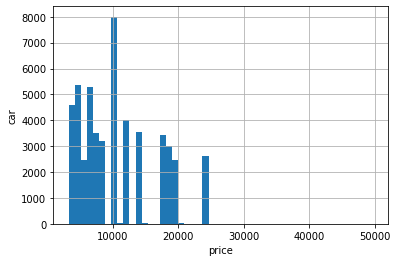

In [33]:
df['price'].hist(bins=50)
plt.xlabel('price')
plt.ylabel('car')

Dari histogram diatas, terlihat bahwa harga mobil yang dijual paling banyak berkisar antara 0 hingga 50.000.
Dan harga yang memuncak sepertinya berada di angka 10.000. Kemudian bins naik turun ke harga 20.000-30.000

### Histogram Age of Car



Text(0, 0.5, 'car')

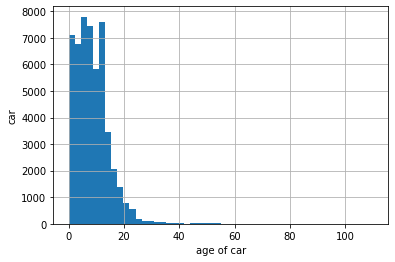

In [34]:
df['age_of_car'].hist(bins=50)
plt.xlabel('age of car')
plt.ylabel('car')

Jumlah usia kendaraan saat dijual memuncak pada angka belasan, lalu turun drastis dan menurun terus pada angka selanjutnya.



### Histogram Odometer



Text(0, 0.5, 'car total')

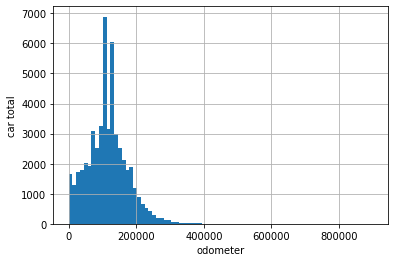

In [35]:
df['odometer'].hist(bins=80, range=(0, 900000))
plt.xlabel('odometer')
plt.ylabel('car total')

Karena nilai max kolom odometer adalah 990.000, saya memutuskan untuk membatasi range di angka 900.000, karena jika range 1.000.0000 nilai sumbu x menjadi berpangkat. Nilai di kisaran 900.000 pun berjumlah sangat sedikit sehingga seharusnya tidak telalu berpengaruh pada tampilan histogram. 

### Histogram Cylinders

Text(0, 0.5, 'car')

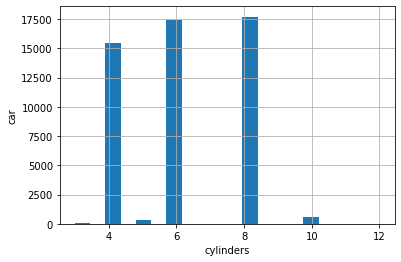

In [36]:
df['cylinders'].hist(bins=20)
plt.xlabel('cylinders')
plt.ylabel('car')

Jumlah silinder terbanyak ditempati oleh 8, 6 dan 4 silinder. 12 silinder sangat sedikit. Terlihat ada 3 atau 5 silinder disana, memang terdengar tidak umum. Tetapi memang ada jumlah silinder ganjil.

### Histogram Condition

Text(0, 0.5, 'car')

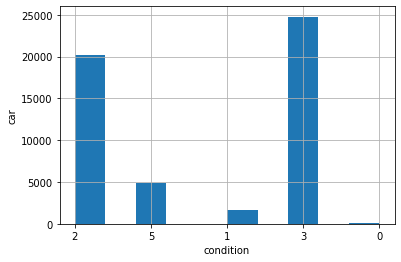

In [37]:
df['condition'].hist()
plt.xlabel('condition')
plt.ylabel('car')

Banyak mobil yang dijual dengan kondisi 3 yaitu excellent, dan 2 yaitu good. Yang berarti kondisi mobil masih sangat bagus dan layak pakai.

### Outlier Kolom Price


In [38]:
df['price'].describe()


count    51525.000000
mean     10678.748394
std       5685.382358
min       3200.000000
25%       6400.000000
50%       9895.000000
75%      13900.000000
max      49750.000000
Name: price, dtype: float64

<AxesSubplot:>

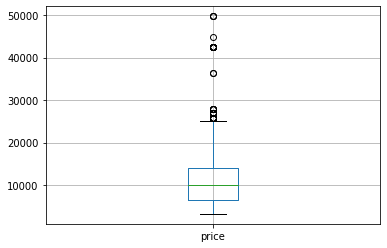

In [39]:
 # Untuk melihat outlier lebih jelas, saya akan menggunakan boxplot
df.boxplot('price')


In [40]:
# menghitung kuantil, menentukan upper dan lower bound kolom price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_price = Q1 - (1.5 * IQR)
upper_bound_price = Q3 + (1.5 * IQR)
print('Lower bound:', lower_bound_price)
print('Upper bound:', upper_bound_price)

Lower bound: -4850.0
Upper bound: 25150.0


In [41]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
df2 = df[ (df['price'] > lower_bound_price) & (df['price'] < upper_bound_price) ].reset_index(drop=True)

### Oulier Kolom Age of Car

In [42]:
df['age_of_car'].describe()

count    51525.000000
mean         8.513906
std          6.112976
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: age_of_car, dtype: float64

<AxesSubplot:>

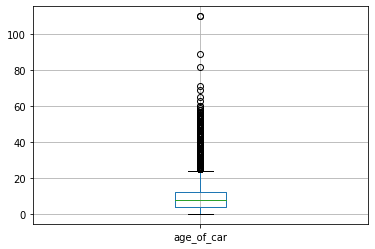

In [43]:
df.boxplot('age_of_car')

In [44]:
# menghitung kuantil,  menentukan upper dan lower bound kolom age of car
Q1 = df['age_of_car'].quantile(0.25)
Q3 = df['age_of_car'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_agecar = Q1 - (1.5 * IQR)
upper_bound_agecar = Q3 + (1.5 * IQR)
print('Lower bound:', lower_bound_agecar)
print('Upper bound:', upper_bound_agecar)

Lower bound: -8.0
Upper bound: 24.0


In [45]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
df2 = df[ (df['age_of_car'] > lower_bound_agecar) & (df['age_of_car'] < upper_bound_agecar) ].reset_index(drop=True)

### Outlier Kolom Odometer

In [46]:
df['odometer'].describe()

count     51525.000000
mean     115199.007278
std       60484.868232
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

<AxesSubplot:>

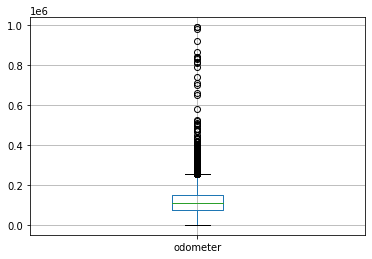

In [47]:
df.boxplot('odometer')

Ada begitu banyak outlier disini, bila dataset ini dicek menggunakan excel, banyak odometer menunjukkan nilai nol dan dibawah seribu, sedangkan kondisi mobil banyak dalam keadaan fair, good ,excellent. 
Tidak mungkin jika odometernya menunjukkan nilai nol.

In [48]:
# menghitung kuantil, menentukan upper dan lower bound kolom odometer
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_odometer = Q1 - (1.5 * IQR)
upper_bound_odometer = Q3 + (1.5 * IQR)
print('Lower bound:', lower_bound_odometer)
print('Upper bound:', upper_bound_odometer)

Lower bound: -32561.5
Upper bound: 256050.5


In [49]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
df2 = df[ (df['odometer'] > lower_bound_odometer) & (df['odometer'] < upper_bound_odometer) ].reset_index(drop=True)

### Outlier Kolom Cylinders

In [50]:
df['cylinders'].describe()

count    51525.000000
mean         6.121067
std          1.657457
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

<AxesSubplot:>

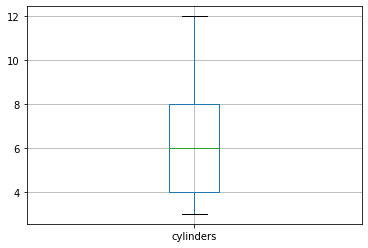

In [51]:
df.boxplot('cylinders')

Tidak ada outlier pada kolom cylinder, namun pendistribusian data tidak seimbang, ini ditandakan dengan letak whiskernya jauh dari kotak.

### Outlier Kolom Condition

In [52]:
#mengubah tipe data kolom condition agar bisa dibuat boxplot
df['condition'] = df['condition'].astype(int)

In [53]:
df['condition'].describe()

count    51525.000000
mean         2.729568
std          0.917570
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

<AxesSubplot:>

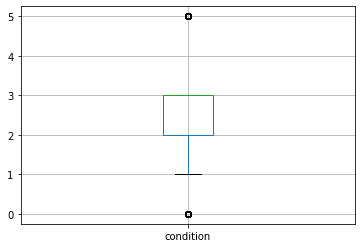

In [54]:
df.boxplot('condition')

In [55]:
# menghitung kuantil. menentukan upper dan lower bound kolom condition
Q1 = df['condition'].quantile(0.25)
Q3 = df['condition'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_condition = Q1 - (1.5 * IQR)
upper_bound_condition = Q3 + (1.5 * IQR)
print('Lower bound:', lower_bound_condition)
print('Upper bound:', upper_bound_condition)

Lower bound: 0.5
Upper bound: 4.5


In [56]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
df2 = df[ (df['condition'] > lower_bound_condition) & (df['condition'] < upper_bound_condition) ].reset_index(drop=True)

In [57]:
# menampilkan dataset baru tanpa outlier
df2.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_listed,month_listed,year_listed,age_of_car,mileage,ford_model
0,10500.0,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,17030.961136,bmw x5
1,10500.0,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7,10418.837293,ford f-150
2,4488.0,2003,ford f-150,1,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,16,21331.337550,ford f-150
3,19800.0,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,9502.454129,chrysler 200
4,13900.0,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,6806.981529,chrysler 300


In [98]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46525 entries, 0 to 46524
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         46525 non-null  float64
 1   model_year    46525 non-null  int64  
 2   model         46525 non-null  object 
 3   condition     46525 non-null  int64  
 4   cylinders     46525 non-null  int64  
 5   fuel          46525 non-null  object 
 6   odometer      46525 non-null  int64  
 7   transmission  46525 non-null  object 
 8   type          46525 non-null  object 
 9   paint_color   46525 non-null  object 
 10  is_4wd        46525 non-null  bool   
 11  date_posted   46525 non-null  object 
 12  days_listed   46525 non-null  int64  
 13  week_listed   46525 non-null  int64  
 14  month_listed  46525 non-null  int64  
 15  year_listed   46525 non-null  int64  
 16  age_of_car    46525 non-null  int64  
 17  mileage       46525 non-null  float64
 18  ford_model    46525 non-nu

Dataset baru ini sudah rapi karena outlier yang ada pada setiap kolom sudah dihapus. Jumlah awal baris data adalah 51525 dan sekarang memiliki jumlah 46525 baris. 

## Mempelajari Parameter Inti Tanpa Outlier

### Perbandingan Kolom Price

Text(0, 0.5, 'car')

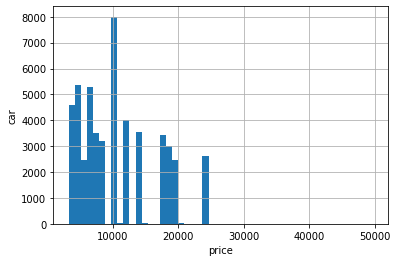

In [58]:
# melakukan perbandingan kolom price dari data lama dan baru
df['price'].hist(bins=50)
plt.xlabel('price')
plt.ylabel('car')

Text(0, 0.5, 'car total')

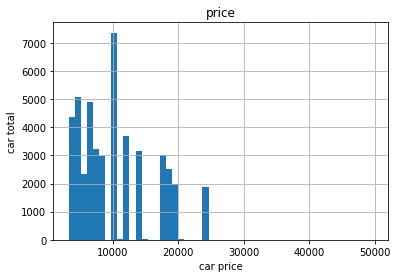

In [59]:
df2.hist('price', bins=50)
plt.xlabel('car price')
plt.ylabel('car total')

Dari perbandingan kedua histogram diatas, dapat ditarik kesimpulan bahwa jumlah harga yang paling banyak dipasang oleh penjual berada di kisaran hampir 7.000 mobil,
sedangkan pada data lama sebelum outlier dibuang, harga terbanyak yang dipasang penjual berada di sekitar 8.000 mobil


### Perbandingan Kolom Age of Car

Text(0, 0.5, 'car total')

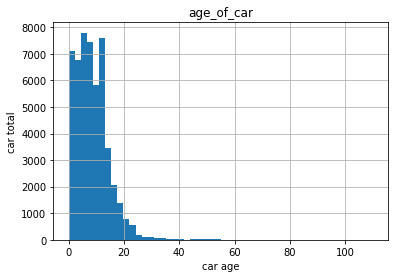

In [60]:
df.hist('age_of_car', bins=50)
plt.xlabel('car age')
plt.ylabel('car total')

Text(0, 0.5, 'car total')

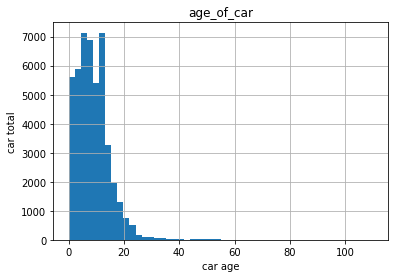

In [61]:
df2.hist('age_of_car', bins=50)
plt.xlabel('car age')
plt.ylabel('car total')

Dibanding kolom lainnya, kolom age_of_car memiliki jumlah outlier paling sedikit. Dilihat dari kedua histogram, penghapusan outlier tidak terlalu berpengaruh pada usia mobil, melainkan jumlah usia mobil pada angka tertentu.

### Perbandingan Kolom Odometer

Text(0, 0.5, 'car total')

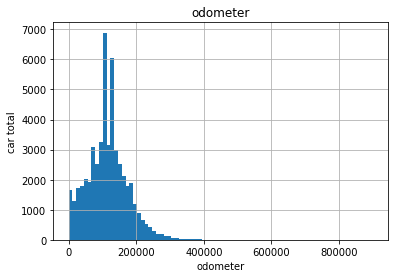

In [62]:
df.hist('odometer', bins=80, range=(0, 900000))
plt.xlabel('odometer')
plt.ylabel('car total')

Text(0, 0.5, 'car total')

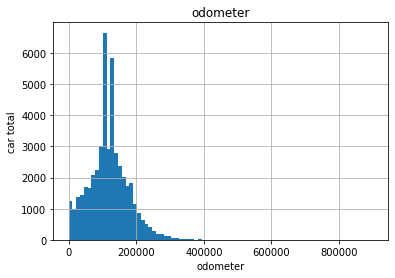

In [63]:
df2.hist('odometer', bins=80, range=(0, 900000))
plt.xlabel('odometer')
plt.ylabel('car total')

Value maksimal dari kolom odometer adalah 990.000, namun saya membuat sumbu x dengan nilai max 900.000 karena jika membuatnya 1.000.000, nilainya akan berpangkat. Dan saat mengecek data dengan excel, nilai odometer di kisaran 900.000 sangat sedikit sehingga seharusnya tidak terlalu berpengaruh pada chart.

Dari kedua hasil histogram diatas, tidak terlalu terlihat perbedaan yang jauh.


### Perbandingan Kolom Cylinders

Text(0, 0.5, 'car total')

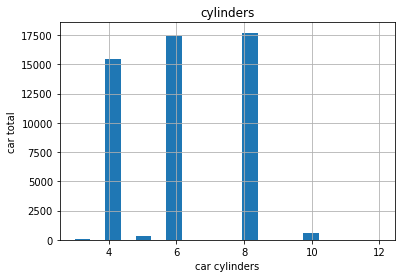

In [64]:
df.hist('cylinders',bins=20)
plt.xlabel('car cylinders')
plt.ylabel('car total')

Karena nilai pada kolom cylinders tidak memiliki outlier, tidak perlu membandingkan dengan data baru. Kendaraan dengan 8 silinder memiliki jumlah terbanyak, disusul dengan kendaraan 6 silinder dan 4 silinder.

### Perbandingan Kolom Condition

Text(0, 0.5, 'car total')

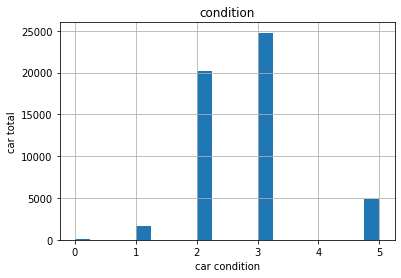

In [65]:
df.hist('condition', bins=20)
plt.xlabel('car condition')
plt.ylabel('car total')

Text(0, 0.5, 'car total')

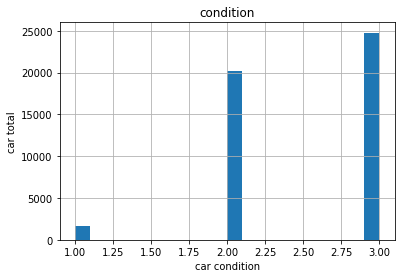

In [66]:
df2.hist('condition', bins=20)
plt.xlabel('car condition')
plt.ylabel('car total')

Setelah menghapus outliers kita dapat melihat bahwa banyak kondisi mobil dengan angka 4 dan 5 yang ternyata outliers. Dengan ini, semua mobil yang dijual memiliki kondisi dari angka 1 hingga 3 saja.

In [67]:
df2['days_listed'].describe()

count    46525.000000
mean        39.603160
std         28.201196
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        267.000000
Name: days_listed, dtype: float64

<AxesSubplot:>

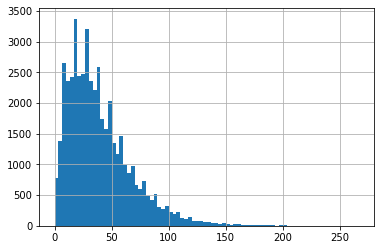

In [113]:
df2['days_listed'].hist(bins=80)

Kita bisa melihat bahwa lamanya iklan ditayangkan sangat bervariasi, ada yang beberapa hari saja, ada yang hingga ratusan hari. Namun bisa dilihat ada nol hari juga disana.


## Masa Berlaku Iklan

In [102]:
df2['days_listed'].describe()

count    46525.000000
mean        39.603160
std         28.201196
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        267.000000
Name: days_listed, dtype: float64

Jumlah iklan ditayangkan paling sedikit adalah 0 hari yang mungkin penjualnya berubah pikiran untuk menjual atau sudah langsung terjual setelah iklan diposting kurang dari 1 hari. Iklan mobil paling lama ditayangkan yaitu 267 hari.

In [68]:
days_pivot_mean = df2.pivot_table(index='date_posted', values='days_listed')
print(days_pivot_mean)

             days_listed
date_posted             
2018-05-01     36.601770
2018-05-02     41.041958
2018-05-03     38.731884
2018-05-04     40.902256
2018-05-05     43.973913
...                  ...
2019-04-15     35.977612
2019-04-16     37.201550
2019-04-17     35.820312
2019-04-18     41.845070
2019-04-19     37.360294

[354 rows x 1 columns]


In [69]:
days_pivot_median = df2.pivot_table(index='date_posted', values='days_listed', aggfunc='median')
print(days_pivot_median)

             days_listed
date_posted             
2018-05-01          33.0
2018-05-02          33.0
2018-05-03          34.0
2018-05-04          31.0
2018-05-05          36.0
...                  ...
2019-04-15          31.0
2019-04-16          31.0
2019-04-17          32.0
2019-04-18          37.0
2019-04-19          32.0

[354 rows x 1 columns]


Dari hasil perhitungan diatas, dapat disimpulkan bahwa umumnya iklan ditayangkan selama sekitar 30 hingga 44 hari.

## Harga Rata-Rata Setiap Jenis Kendaraan

In [70]:
# menganalisa jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan
ad_price_counts = df2.pivot_table(index='type', values='price', aggfunc=['mean','count']).round(2)
ad_price_counts.columns = ['average_price', 'ad_counts']
print(ad_price_counts)

             average_price  ad_counts
type                                 
SUV               10002.28      11209
bus                8485.42         24
convertible        9245.80        394
coupe             11700.27       2076
hatchback         10238.09        921
mini-van           9524.68       1060
offroad            7677.56        179
other             10080.57        250
pickup            10544.34       6382
sedan             10698.17      10746
truck             10275.74      11227
van               10198.49        592
wagon              9724.88       1465


Dari hasil analisa menggunakan pivot table, ada 2 jenis kendaraan dengan jumlah iklan paling banyak, yaitu truck dan SUV.

<AxesSubplot:xlabel='type'>

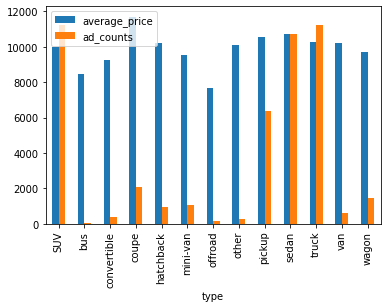

In [71]:
ad_price_counts.plot(kind='bar')

Dari grafik diatas, ada beberapa mobil yang kebetulan memiliki jumlah iklan hampir setara dengan jumlah mobil yang dijual, seperti sedan, truck dan SUV.

<AxesSubplot:title={'center':'Average Price vs Ad Counts'}, xlabel='average_price', ylabel='ad_counts'>

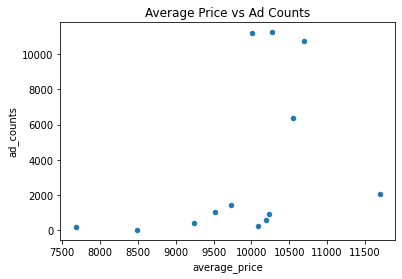

In [72]:
# grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan
ad_price_counts.plot(y='ad_counts', x='average_price', kind='scatter', title='Average Price vs Ad Counts')

Bisa dilihat bahwa tidak ada ketergantungan antara jumlah iklan dengan jenis kendaraan

## Faktor Harga

Menganalisa berbagai faktor yang dapat mempengaruhi harga jual mobil.

### Faktor Harga Truck

In [73]:
df_truck = df2[df2['type'] == 'truck'].reset_index(drop=True)

In [74]:
# menggunakan matriks korelasi untuk melihat faktor yang mempengaruhi penjualan
df_truck.corr()['age_of_car']

price          -0.861662
model_year     -0.996843
condition      -0.311985
cylinders      -0.005293
odometer        0.448112
is_4wd         -0.171424
days_listed     0.011061
week_listed     0.009176
month_listed   -0.061380
year_listed     0.074882
age_of_car      1.000000
mileage         0.448112
Name: age_of_car, dtype: float64

Penjualan mobil berdasarkan usianya berpengaruh, semakin tua usia mobil maka harga jualnya akan rendah.

#### Scatterplot Truck Age of Car

<AxesSubplot:title={'center':'correlation between price and car age'}, xlabel='price', ylabel='age_of_car'>

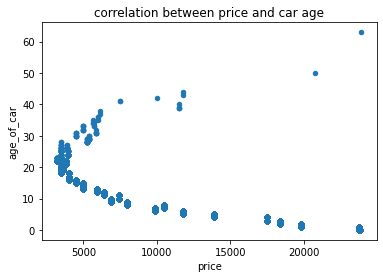

In [75]:
df_truck.plot(x='price', y='age_of_car', kind='scatter', title='correlation between price and car age')

Dengan nilai korelasi 1, terdapat hubungan linear antara usia mobil dengan penjualannya.

In [76]:
# menggunakan matriks korelasi untuk melihat faktor yang mempengaruhi penjualan
df_truck.corr()['odometer']

price          -0.508947
model_year     -0.448956
condition      -0.275924
cylinders      -0.022503
odometer        1.000000
is_4wd         -0.075331
days_listed     0.001990
week_listed     0.003611
month_listed   -0.000848
year_listed     0.005190
age_of_car      0.448112
mileage         1.000000
Name: odometer, dtype: float64

Odometer atau jarak tempuh juga berperan dalam penjualan sebuah mobil, semakin sedikit jarak tempuh, mobil akan bisa dijual dengan harga lebih tinggi

#### Scatterplot Truck Odometer

<AxesSubplot:title={'center':'correlation between price and odometer'}, xlabel='price', ylabel='odometer'>

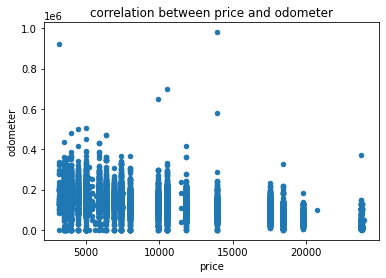

In [77]:
df_truck.plot(x='price', y='odometer', kind='scatter', title='correlation between price and odometer')

Nilai korelasi yang dimiliki antara odometer dan penjualan sebuah mobil juga bernilai 1, ini berarti memang ada korelasi antara kedua hal ini.

#### Scatterplot Truck Condition

In [148]:
df_truck.corr()['condition']

price           0.286410
model_year      0.313035
condition       1.000000
cylinders       0.013363
odometer       -0.275924
is_4wd          0.118792
days_listed    -0.000664
week_listed     0.003429
month_listed   -0.012711
year_listed     0.002195
age_of_car     -0.311985
mileage        -0.275924
Name: condition, dtype: float64

Kondisi mobil yang bagus tentu memiliki nilai jual lebih tinggi.

<AxesSubplot:title={'center':'correlation between price and condition'}, xlabel='price', ylabel='condition'>

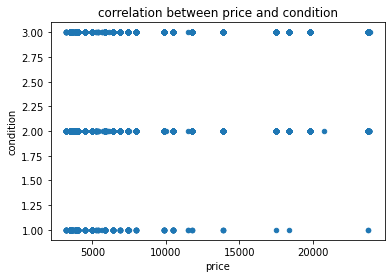

In [143]:
df_truck.plot(x='price', y='condition', kind='scatter', title='correlation between price and condition')

Harga dan kondisi mobil terlihat sejajar

#### Boxplot Truck Transmission

In [122]:
df_truck['transmission'].value_counts()

automatic    10608
manual         422
other          197
Name: transmission, dtype: int64

Mobil truck yang dijual lebih banyak yang menggunakan transmisi otomatis.

Text(0.5, 1.0, 'correlation between price and transmission')

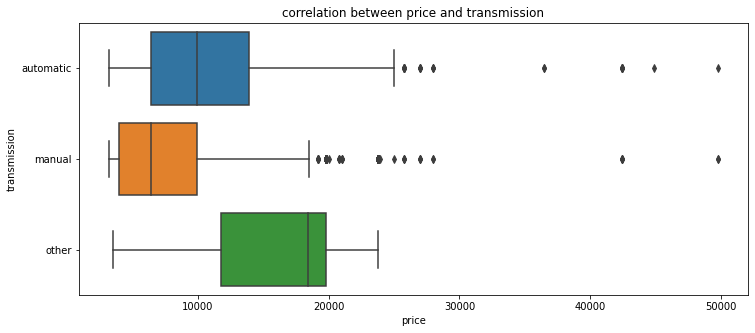

In [157]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='price', y='transmission')
plt.title('correlation between price and transmission')

Berdasarkan hasil research, transmisi mobil yang paling digemari pengendara adalah manual. Mungkin itu sebabnya jenis transmisi mobil yang paling banyak dijual adalah otomatis.

#### Boxplot Truck Paint Color

In [126]:
# tidak mengikutsertakan nilai dengan jumlah dibawah 50
df_truck['paint_color'].value_counts()[:-2]

white      3412
unknown    1949
black      1418
red         957
silver      919
grey        844
blue        804
custom      299
green       265
brown       233
yellow       65
Name: paint_color, dtype: int64

Warna mobil yang paling banyak dijual adalah putih dan hitam, lalu ada 1949 mobil yang tidak diketahui warnanya.

Text(0.5, 1.0, 'correlation between price and paint_color')

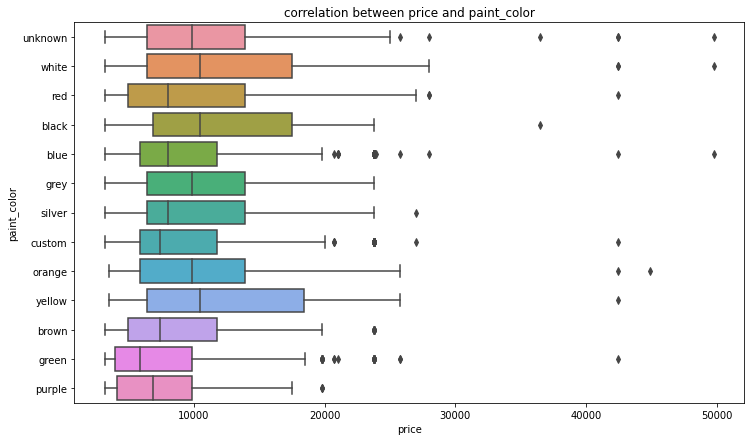

In [137]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df, x='price', y='paint_color')
plt.title('correlation between price and paint_color')

Terdapat sedikit korelasi antara warna mobil dengan harga jual. Warna umum seperti white dan black dapat dijual dengan harga tinggi dibandingkan dengan warna lainnya.

### Faktor Harga SUV

In [80]:
df_suv = df2[df2['type'] == 'SUV'].reset_index(drop=True)

In [81]:
# menggunakan matriks korelasi untuk melihat faktor yang mempengaruhi penjualan
df_suv.corr()['age_of_car']

price          -0.850656
model_year     -0.996383
condition      -0.298489
cylinders       0.235456
odometer        0.515943
is_4wd          0.054321
days_listed     0.013613
week_listed     0.000292
month_listed   -0.058978
year_listed     0.072627
age_of_car      1.000000
mileage         0.515943
Name: age_of_car, dtype: float64

#### Scatterplot SUV Age of Car

<AxesSubplot:title={'center':'correlation between price and car age'}, xlabel='price', ylabel='age_of_car'>

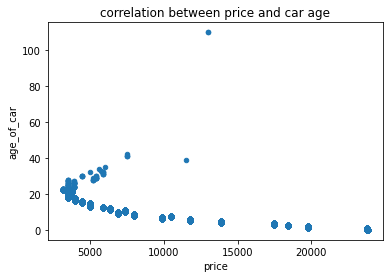

In [82]:
df_suv.plot(x='price', y='age_of_car', kind='scatter', title='correlation between price and car age')

Dengan nilai korelasi 1, faktor usia kendaraan memiliki linear dengan penjualan sebuah mobil.

#### Scatterplot SUV Odometer

In [83]:
df_suv.corr()['odometer']

price          -0.578102
model_year     -0.518089
condition      -0.313639
cylinders       0.177703
odometer        1.000000
is_4wd          0.007916
days_listed     0.008994
week_listed     0.006466
month_listed    0.005517
year_listed    -0.009625
age_of_car      0.515943
mileage         1.000000
Name: odometer, dtype: float64

<AxesSubplot:title={'center':'correlation between price and odometer'}, xlabel='price', ylabel='odometer'>

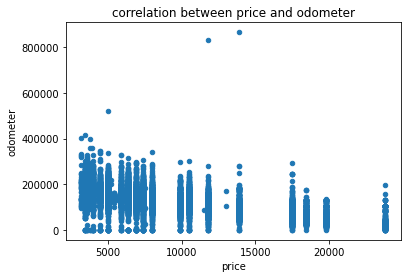

In [84]:
df_suv.plot(x='price', y='odometer', kind='scatter', title='correlation between price and odometer')

Nilai kedua faktor membentuk garis sejajar, ini adalah korelasi linear.

#### Scatterplot SUV Condition

In [85]:
df_suv.corr()['condition']

price           0.261947
model_year      0.298225
condition       1.000000
cylinders      -0.086382
odometer       -0.313639
is_4wd          0.000295
days_listed    -0.012708
week_listed     0.001625
month_listed    0.011407
year_listed    -0.012110
age_of_car     -0.298489
mileage        -0.313639
Name: condition, dtype: float64

Nilai korelasi yang dihasilkan adalah 1, yang berarti memiliki hubungan linear.

<AxesSubplot:title={'center':'correlation between price and condition'}, xlabel='price', ylabel='odometer'>

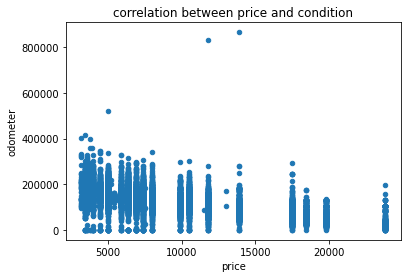

In [86]:
df_suv.plot(x='price', y='odometer', kind='scatter', title='correlation between price and condition')

Faktor odometer pun membentuk garis sejajar dengan harga mobil, ini berarti memiliki hubungan korelasi linear.

#### Boxplot SUV Transmission

In [87]:
df_suv['transmission'].value_counts()

automatic    10574
manual         488
other          147
Name: transmission, dtype: int64

Banyak mobil yang dijual memiliki transmisi otomatis.

Text(0.5, 1.0, 'correlation between price and transmission')

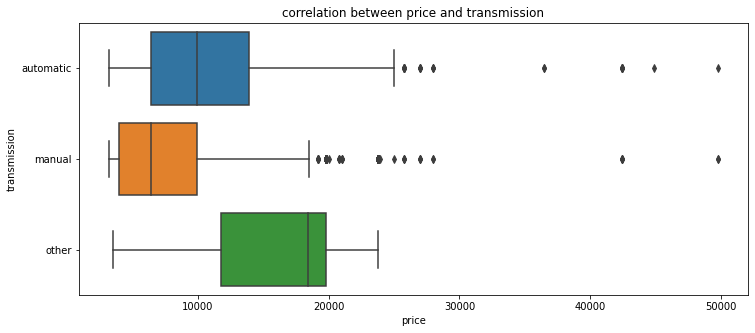

In [88]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='price', y='transmission')
plt.title('correlation between price and transmission')

Sama dengan hasil pada mobil truck, pengendara umumnnya menyukai transmisi manual, sehingga itulah mungkin sebabnya lebih banyak mobil dengan transmisi otomatis yang dijual.

#### Boxplot SUV Paint Color

In [90]:
# tidak mengikutsertakan nilai dengan jumlah dibawah 50
df_truck['paint_color'].value_counts()[:-2]

white      3412
unknown    1949
black      1418
red         957
silver      919
grey        844
blue        804
custom      299
green       265
brown       233
yellow       65
Name: paint_color, dtype: int64

Warna mobil yang paling banyak dijual adalah putih dan hitam, ada 1949 mobil yang tidak diketahui warnanya.

Text(0.5, 1.0, 'correlation between price and paint_color')

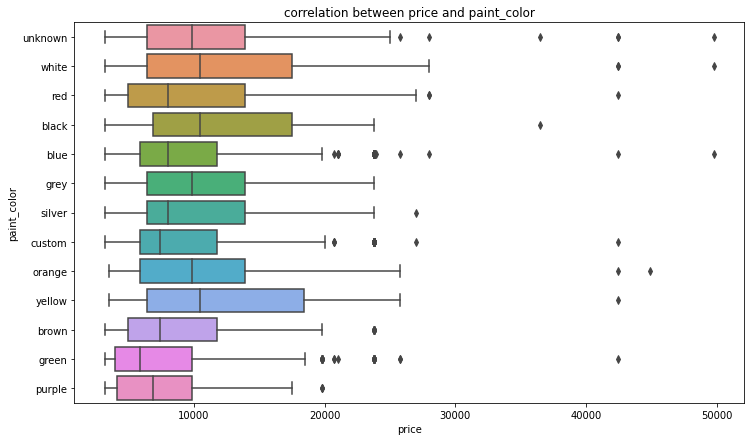

In [91]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df, x='price', y='paint_color')
plt.title('correlation between price and paint_color')

Dari boxplot diatas, terdapat sedikit korelasi antara warna mobil dengan harga penjualan mobil. Untuk warna putih dan hitam, karena kedua warna tersebut umum dan netral, dapat dijual dengan harga lebih mahal dibandingkan dengan warna lainnya.

## Kesimpulan Umum

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kerja bagus!

</div>

Setelah melakukan banyak proses pada data ini, berikut langkah yang saya gunakan :

- Di awal, seperti biasa melakukan pengecekan info data, duplikat, dan nilai yang hilang.
- Tidak ada duplikat pada data ini, namun ada nilai yang hilang dan outliers yang harus ditangani
- Dengan menggunakan fungsi, saya mengisi nilai yang hilang berdasarkan kolom tertentu
- Untuk outliers, setelah menampilkannya lewat boxplot, kemudian saya menghitung batas atas dan bawah pada whiskers,
  lalu menghapus outlier pada setiap kolom berdasarkan perhitungan tersebut.
- Beberapa tipe data memiliki tipe yang kurang sesuai sehingga perubahan tipe data perlu dilakukan.
- Setelah membuang data outliers, proses data pun dilakukan kembali dengan menggunakan histogram,
  untuk membandingkan perubahan sebelum dan sesudah outliers dihapus.
- Kemudian saya menghitung nilai korelasi untuk setiap faktor yang mungkin mempengaruhi penjualan sebuah mobil.
- Lalu saya menampilkan scatterplot serta boxplot untuk menampilkan korelasi tersebut.

Untuk jenis kendaraan paling banyak dijual di Crankshaft List adalah mobil truck dan SUV.

Berikut kesimpulan untuk menjawab faktor apa saja yang bisa mempengaruhi harga sebuah mobil.Berdasarkan segala perhitungan yang sudah dilakukan dan juga melihat korelasi, ada beberapa faktor :
    
- usia kendaraan, jika usia mobil semakin tua, maka harga jualnya pun makin turun, jika usia mobil masih baru,
  harga jualnya  bisa lebih tinggi.
- odometer, jika mobil memiliki jarak tempuh jauh, itu berarti mobil sering digunakan, maka harga jualnya pun umumnya tidak bisa   terlalu tinggi.
- kondisi mobil, tentu saja ini juga berpengaruh. Jika mobil dalam kondisi buruk, tentu tidak bisa dijual dengan harga tinggi.
- untuk transmisi, sebenarnya tidak terlalu berpengaruh pada harga jual, ini sepertinya lebih ke preferensi masing-masing untuk  menggunakan jenis transmisi apa.
- warna mobil, sedikit berpengaruh jika mobil yang dimiliki berwarna netral dan umum seperti hitam atau putih maka bisa dijual dengan harga lebih tinggi dibandingkan dengan warna hijau atau coklat.
    